In [3]:
#this sets up a tester Main service class with constant file data instead of taking time to download from all sources

In [1]:
import json
from MainService import MainService
with open('jsondata/allcleandata.json','r') as f:
    data = f.read()
allCleanData = json.loads(data)
with open('jsondata/allcleannames.json','r') as f:
    data = f.read()
allCleanNames = json.loads(data)
m = MainService(allCleanData, allCleanNames)

---------------------------------------------------------------------------
Data Collection Succesful.
TimeSeries dictionary has 9328 entries.
Correlator initialized.


In [ ]:
#This will search the database for matching series titles

In [82]:
m.queryNames("DOW")

{'Dow Jones Industrial Average'}

In [54]:
#This shows the highest correlated commodities as well as plots the timeseriesdata

PPI Commodity data for Transportation services-Shipping services (competitive services) not seasonally adjusted
PPI industry data for U.S. Postal Service-Shipping services (competitive services) not seasonally adjusted
PPI industry data for Jewelry and silverware mfg-All other jewelry and personal goods (excluding costume) not seasonally adjusted
PPI industry data for Textile bag and canvas mills-Miscellaneous receipts not seasonally adjusted
PPI industry data for Cut and sew apparel contractors-Primary products not seasonally adjusted


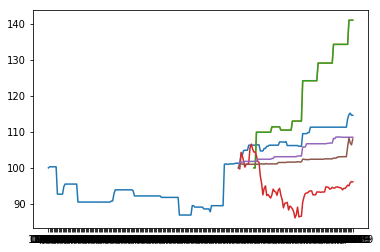

In [86]:
search = 'PPI industry data for Oil and gas field machinery and equipment mfg-Oil and gas field derricks and well surveying machinery not seasonally adjusted'
names = []
highest = m.findFiveHighestCorrelated(search)
names.append(m.getIdFromName(search))
for i in highest:
    print(m.getNameFromId(i[0]))
    names.append(i[0])
plotTimeSeries(names)

In [50]:
import matplotlib.pyplot as plt
def plotTimeSeries(Ids):
    for Id in Ids:
        x = list(m.TimeSeries[Id].keys())
        y = list(m.TimeSeries[Id].values())
        plt.plot(x,y)
    plt.show()

    

In [87]:
print(highest)

[('WPU30160108', 0.46201745372340397), ('PCU4911104911108', 0.46201745372340397), ('PCU3399103399108', 0.42704176442286573), ('PCU314910314910M', 0.3807644643214974), ('PCU315210315210P', 0.3767289964405774)]


In [48]:
print(m.TimeSeries['WPSID69215'])

{'01/1967': 23.0, '02/1967': 22.6, '03/1967': 22.3, '04/1967': 21.7, '05/1967': 21.9, '06/1967': 22.2, '07/1967': 22.2, '08/1967': 22.2, '09/1967': 22.2, '10/1967': 22.3, '11/1967': 22.7, '12/1967': 22.9, '01/1968': 22.7, '02/1968': 22.7, '03/1968': 23.0, '04/1968': 22.3, '05/1968': 22.0, '06/1968': 22.2, '07/1968': 22.5, '08/1968': 22.5, '09/1968': 22.6, '10/1968': 23.0, '11/1968': 23.1, '12/1968': 23.2, '01/1969': 23.4, '02/1969': 23.3, '03/1969': 23.9, '04/1969': 24.4, '05/1969': 24.8, '06/1969': 25.2, '07/1969': 25.6, '08/1969': 26.2, '09/1969': 26.5, '10/1969': 26.5, '11/1969': 26.5, '12/1969': 26.7, '01/1970': 26.8, '02/1970': 27.1, '03/1970': 27.0, '04/1970': 26.8, '05/1970': 26.8, '06/1970': 26.6, '07/1970': 26.2, '08/1970': 25.6, '09/1970': 25.9, '10/1970': 26.1, '11/1970': 25.2, '12/1970': 25.8, '01/1971': 25.9, '02/1971': 25.8, '03/1971': 25.4, '04/1971': 25.8, '05/1971': 25.7, '06/1971': 25.6, '07/1971': 25.9, '08/1971': 25.6, '09/1971': 25.8, '10/1971': 25.9, '11/1971': 25